# Leveraging Data-Driven Insights to Uncover Value in the Indian Ecosystem



## Table of Contents
<!-- TOC -->

- [Step 1: Business Understanding](#step-1-business-understanding)
  - [Scenario](#scenario)
  - [Objective](#objective)
  - [Hypothesis: Influence of Top Investors](#hypothesis-influence-of-top-investors)
  - [Key Business Questions](#key-business-questions)
  - [Approach](#approach)
- [Step 2: Data Understanding](#step-2-data-understanding)
  - [Project Initialisation](#project-initialisation)
  - [Data Collection](#data-collection)
    - [Access the 2020 and 2021 data from Microsoft SQL Server](#access-the-2020-and-2021-data-from-microsoft-sql-server)
      - [Connect to the database using provided credentials](#connect-to-the-database-using-provided-credentials)
      - [Fetch Information Schema for tables in the database](#fetch-information-schema-for-tables-in-the-database)
      - [Load LP1\_startup\_funding2021 Data](#load-lp1_startup_funding2021-data)
      - [Load LP1\_startup\_funding2020 Data](#load-lp1_startup_funding2020-data)
    - [Access 2019 data from OneDrive](#access-2019-data-from-onedrive)
    - [Access the 2018 data from GitHub Repository](#access-the-2018-data-from-github-repository)
  - [Data Quality Considerations](#data-quality-considerations)
- [Step 3: Data Preparation](#step-3-data-preparation)
  - [Data Cleaning](#data-cleaning)
  - [Data Transformation](#data-transformation)
  - [Data Integration](#data-integration)

<!-- /TOC -->

[Back to Top](#Table-of-Contents)

## Step 1: Business Understanding

### Background
A "startup" is typically characterized by its age, size, and funding method, though there isn't a strict definition. Generally, a startup is a young company, only a few years old, that hasn't yet achieved consistent revenue. These companies operate on a small scale, often with just a working prototype or a paid pilot, but they have the potential for rapid growth and expansion. Initially, they are funded by the founders' personal networks, including friends and family, and they actively seek additional financing to support their growth and establish a sustainable business.

As an example, the Government of India’s Startup India program defines a “startup” as a company (PIB 2017) that is:

    1. Headquartered in India with not more than ten years since incorporation or registration
   
    2. Having an annual turnover of less than INR 1 billion (roughly $14 million) (Startup India 2019)

`Available:` [ADBI Working Paper Series](https://www.adb.org/publications/startup-environment-and-funding-activity-india)

### Scenario
Your team is trying to venture into the Indian start-up ecosystem. As the data expert of the team, you are to investigate the ecosystem and propose the best course of action. 

### Objective
The primary objective is to analyse the funding landscape for start-ups in India from 2018 to 2021, focusing on identifying key trends and patterns. This analysis will provide crucial insights into the Indian start-up ecosystem, which will guide strategic decisions for entering and navigating the market effectively. 

### Hypothesis: Influence of Top Investors

**A. Rationale:**

Determining the influence of top investors on the success of start-ups can provide insights into the impact of investor reputation and networks. This can guide new start-ups in selecting potential investors and understanding the benefits of partnering with top-tier investors.

**B. Null Hypothesis (H0):**

Start-ups funded by top investors do not have higher subsequent funding rounds compared to those funded by less active investors.

**C. Alternative Hypothesis (H1):**

Start-ups funded by top investors have higher subsequent funding rounds compared to those funded by less active investors.

### Key Business Questions

**1. Is there a correlation between funding amounts from top investors (blue-chip investors) and the performance metrics of start-ups?**

Exploring the correlation between funding amounts from top investors and start-up performance metrics can help evaluate the effectiveness of investments made by these investors.

**2. Who are the most active investors in the Indian start-up ecosystem?**

Identifying the most active investors can help in analyzing the influence of top investors on subsequent funding rounds.

**3. Are there any geographical trends or hotspots for start-up funding in India?**

Analyzing geographical trends in start-up funding can provide context for understanding the influence of top investors in different regions.

**4. Are there any annual trends in start-up funding in India from 2018 to 2021?**

Understanding annual trends in start-up funding can provide background information for assessing the impact of top investors on subsequent funding rounds.

**5. Which sectors received the most funding each year?**

Analyzing the sectors that received the most funding can provide additional context for evaluating the influence of top investors.

**6. What impact do the years of existence or age of a start-up have on investment opportunities?**

Understanding how the age of a start-up influences investment opportunities can provide insights into whether start-ups funded by top investors indeed have higher subsequent funding rounds.

**7. What are the funding stages (seed, series A, etc.) that received the highest investments?**

Examining the funding stages that received the highest investments can offer insights into the funding patterns of top investors.

### Approach
In conclusion, to understand the trends and patterns in start-up funding in India from 2018 to 2021, a comprehensive approach will be implemented. This will involve gathering detailed data on start-ups, funding amounts, stages, sectors, geographic locations, and investors. The collected data will be analyzed using descriptive statistics, trend analysis, visualizations, and statistical tests to derive key insights. These insights will be compiled into detailed reports and dashboards, providing actionable information and strategic recommendations. Ultimately, this analysis will offer data-driven guidance on the most promising sectors, regions, and funding stages to focus on, identify key investors for potential partnerships, and assess the overall attractiveness of the Indian start-up market for strategic entry.

[Back to Top](#Table-of-Contents)

## Step 2: Data Understanding

`Data Collection`

To effectively analyse the Indian start-up ecosystem from 2018 to 2021, comprehensive data collection is crucial. The data will be sourced from multiple datasets that detail startup funding activities within this period. Each dataset will encompass various aspects essential for a holistic understanding of the funding landscape. Specifically, the datasets will include:

**A. Start-up Details:**

-   Company/Brand: Name of the company/start-up

-   Founded: Year start-up was founded

-   Headquarters/Location: The geographical location of the start-up, including city and region.

-   Sector/Industry: The industry or sector in which the start-up operates, such as healthtech, fintech, etc.

-   What it does/About Company: Description about Company

-   Founders: Founders of the Company

**B. Funding Information:**

-   Amount: The total amount of funding received by the start-up in each funding round.

-   Stage/Round: Details of the funding stages such as seed, series A, series B, etc.

**C. Investors' Information:**

-   Investors: The names of the investors or investment firms involved.

`Data Quality Considerations`

Ensuring high data quality is paramount for reliable analysis and actionable insights. Key considerations for maintaining data quality include:

**A. Completeness:**

Ensure that all necessary fields are filled in across the datasets. This includes making sure that no critical information is missing for any of the start-ups, funding rounds, or investors.

**B. Consistency:**

Handle any inconsistencies in data entries. This may involve standardizing entries for sectors, locations, and investor names to ensure uniformity. For example, variations in how sectors are labeled (e.g., "Healthtech" vs. "Health Technology") should be standardized to a single format.

**C. Handling Missing Data:**

Identify and address missing data points. Techniques such as imputation, where appropriate, or excluding certain records if the missing data is minimal and does not impact overall analysis, will be employed.

### Project Initialisation

In [122]:
# Importing necessary libraries
from dotenv import dotenv_values
import pyodbc
import requests
import pandas as pd
import numpy as np
import scipy.stats as stats
import re
import calendar
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Suppressing all warnings to avoid cluttering the output
warnings.filterwarnings("ignore")

# Set display options for Pandas DataFrame
pd.set_option("display.max_rows", 100)
pd.set_option("display.max_columns", 100)

### Data Collection

The task involves accessing three different datasets from different sources: a database, OneDrive, and a GitHub repository. Each dataset has a specific method of access, such as querying a database using ODBC or ORM library, downloading a file programmatically using the requests library from OneDrive, and cloning or downloading a file from a GitHub repository using gitpython or requests library.

#### Access the 2020 and 2021 data from Microsoft SQL Server

##### Connect to the database using provided credentials

In [123]:
# Load environment variables from .env file
environment_variables = dotenv_values("LP1_DAP.env")

# Retrieve environment variables for database connection
server_name = environment_variables.get("server")
password = environment_variables.get("password")
login = environment_variables.get("login")
database_name = environment_variables.get("database")

# Create a database connection string using pyodbc
connection_string = f"DRIVER={{SQL Server}};SERVER={server_name};DATABASE={database_name};UID={login};PWD={password};"

#Establish a connection to the database
try:
    connection = pyodbc.connect(connection_string)
    print("Connection successful:", connection_string)    
except Exception as e:
    print("Connection failed:", e)

Connection successful: DRIVER={SQL Server};SERVER=dap-projects-database.database.windows.net;DATABASE=dapDB;UID=LP1_learner;PWD=Hyp0th3s!$T3$t!ng;


##### Fetch Information Schema for tables in the database

In [124]:
# Define the SQL query to show specific tables in the database
db_query = """
        SELECT *
        FROM INFORMATION_SCHEMA.TABLES
        WHERE TABLE_SCHEMA = 'dbo'
        """
# Read data from the SQL query result into a DataFrame using the established database connection
schema_df = pd.read_sql(db_query, connection)

#  Check whether data has been retrieved successfully to confirm successful connection to database
try:
    schema_df = pd.read_sql(db_query, connection)    
    print("Data retrieved successfully")
    print()
    print(schema_df)    
except Exception as e:
    print("Failed to retrieve data:", e)

Data retrieved successfully

  TABLE_CATALOG TABLE_SCHEMA               TABLE_NAME  TABLE_TYPE
0         dapDB          dbo  LP1_startup_funding2021  BASE TABLE
1         dapDB          dbo  LP1_startup_funding2020  BASE TABLE


##### Load LP1_startup_funding2021 Data

In [125]:
# Define the SQL query to show specific tables in the database
db_query1 = """
        SELECT *
        FROM LP1_startup_funding2021        
        """
# Read data from the SQL query result into a DataFrame using the established database connection
df2021 = pd.read_sql(db_query1, connection)

# Display DataFrame Info
df2021.info()
print()

# Display the DataFrame
df2021.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1209 entries, 0 to 1208
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1209 non-null   object 
 1   Founded        1208 non-null   float64
 2   HeadQuarter    1208 non-null   object 
 3   Sector         1209 non-null   object 
 4   What_it_does   1209 non-null   object 
 5   Founders       1205 non-null   object 
 6   Investor       1147 non-null   object 
 7   Amount         1206 non-null   object 
 8   Stage          781 non-null    object 
dtypes: float64(1), object(8)
memory usage: 85.1+ KB



,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",None
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed


##### Load LP1_startup_funding2020 Data

In [126]:
# Define the SQL query to show specific tables in the database
db_query2 = """
        SELECT *
        FROM LP1_startup_funding2020        
        """
# Read data from the SQL query result into a DataFrame using the established database connection
df2020 = pd.read_sql(db_query2, connection)

# Display DataFrame Info
df2020.info()
print()

# Display the DataFrame
df2020.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1055 non-null   object 
 1   Founded        842 non-null    float64
 2   HeadQuarter    961 non-null    object 
 3   Sector         1042 non-null   object 
 4   What_it_does   1055 non-null   object 
 5   Founders       1043 non-null   object 
 6   Investor       1017 non-null   object 
 7   Amount         801 non-null    float64
 8   Stage          591 non-null    object 
 9   column10       2 non-null      object 
dtypes: float64(2), object(8)
memory usage: 82.5+ KB



,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10
0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,None,None
1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,None
2,PadCare Labs,2018.0,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed,None
3,NCOME,2020.0,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000.0,None,None
4,Gramophone,2016.0,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000.0,None,None


#### Access 2019 data from OneDrive

In [127]:
# Path of CSV file
file_path = r"C:\Users\Nfayem\OneDrive\Azubi_Africa\GitHub\LP1_Data_Analytics_Project\Data\startup_funding2019.csv"

# Read the CSV file into a pandas DataFrame
df2019 = pd.read_csv(file_path)

# Display DataFrame Info
df2019.info()
print()

# Display the DataFrame
df2019.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  89 non-null     object 
 1   Founded        60 non-null     float64
 2   HeadQuarter    70 non-null     object 
 3   Sector         84 non-null     object 
 4   What it does   89 non-null     object 
 5   Founders       86 non-null     object 
 6   Investor       89 non-null     object 
 7   Amount($)      89 non-null     object 
 8   Stage          43 non-null     object 
dtypes: float64(1), object(8)
memory usage: 6.4+ KB



,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",NaN
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding
3,HomeLane,2014.0,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...","$30,000,000",Series D
4,Nu Genes,2004.0,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),"$6,000,000",NaN


#### Access the 2018 data from GitHub Repository

In [8]:
# URL of the file to download
url = "https://github.com/Azubi-Africa/Career_Accelerator_LP1-Data_Analysis/raw/main/startup_funding2018.csv"

# Local file path where the file will be saved
local_file_path = r"C:\Users\Nfayem\OneDrive\Azubi_Africa\GitHub\LP1_Data_Analytics_Project\Data\startup_funding2018.csv"

# Send a GET request to the URL
response = requests.get(url)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Write the content of the response to the specified file path
    with open(local_file_path, "wb") as f:
        f.write(response.content)
    print("File downloaded successfully")
else:
    print("Failed to download file")

# Read the downloaded CSV file into a DataFrame
df2018 = pd.read_csv(local_file_path)

# Display DataFrame Info
print()
df2018.info()
print()

# Display the DataFrame
df2018.head()

File downloaded successfully

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company Name   526 non-null    object
 1   Industry       526 non-null    object
 2   Round/Series   526 non-null    object
 3   Amount         526 non-null    object
 4   Location       526 non-null    object
 5   About Company  526 non-null    object
dtypes: object(6)
memory usage: 24.8+ KB



,Company Name,Industry,Round/Series,Amount,Location,About Company
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...


### Data Quality Considerations
The datasets are carefully examined to identify common data quality issues such as missing values, outliers, duplicates, inconsistencies, and errors. 

#### Load LP1_startup_funding2021 Data

##### Missing and Duplicate Data Quality Considerations

In [128]:
# Determine the proportion of missing values
missing_percentage_21 = (df2021.isnull().mean() * 100).round(2)

# Check for duplicated values
duplicate_count_21 = df2021.duplicated(subset=None, keep=False).sum()

# Display duplicated rows if any
duplicated_rows_21 = df2021[df2021.duplicated(subset=None, keep=False)]

# Display Results
print("Proportion of missing values in 2021 data:")
print()
print(missing_percentage_21)
print("\nNumber of duplicated rows in 2021 data:", duplicate_count_21)
print("\nDuplicated rows in 2021 data:")
duplicated_rows_21

Proportion of missing values in 2021 data:

Company_Brand     0.00
Founded           0.08
HeadQuarter       0.08
Sector            0.00
What_it_does      0.00
Founders          0.33
Investor          5.13
Amount            0.25
Stage            35.40
dtype: float64

Number of duplicated rows in 2021 data: 38

Duplicated rows in 2021 data:


,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
94,Curefoods,2020.0,Bangalore,Food & Beverages,Healthy & nutritious foods and cold pressed ju...,Ankit Nagori,"Iron Pillar, Nordstar, Binny Bansal",$13000000,None
96,Bewakoof,2012.0,Mumbai,Apparel & Fashion,Bewakoof is a lifestyle fashion brand that mak...,Prabhkiran Singh,InvestCorp,$8000000,None
98,FanPlay,2020.0,Computer Games,Computer Games,A real money game app specializing in trivia g...,YC W21,"Pritesh Kumar, Bharat Gupta",Upsparks,$1200000
104,Advantage Club,2014.0,Mumbai,HRTech,Advantage Club is India's largest employee eng...,"Sourabh Deorah, Smiti Bhatt Deorah","Y Combinator, Broom Ventures, Kunal Shah",$1700000,None
106,Ruptok,2020.0,New Delhi,FinTech,Ruptok fintech Pvt. Ltd. is an online gold loa...,Ankur Gupta,Eclear Leasing,$1000000,None
107,Curefoods,2020.0,Bangalore,Food & Beverages,Healthy & nutritious foods and cold pressed ju...,Ankit Nagori,"Iron Pillar, Nordstar, Binny Bansal",$13000000,None
109,Bewakoof,2012.0,Mumbai,Apparel & Fashion,Bewakoof is a lifestyle fashion brand that mak...,Prabhkiran Singh,InvestCorp,$8000000,None
111,FanPlay,2020.0,Computer Games,Computer Games,A real money game app specializing in trivia g...,YC W21,"Pritesh Kumar, Bharat Gupta",Upsparks,$1200000
117,Advantage Club,2014.0,Mumbai,HRTech,Advantage Club is India's largest employee eng...,"Sourabh Deorah, Smiti Bhatt Deorah","Y Combinator, Broom Ventures, Kunal Shah",$1700000,None
119,Ruptok,2020.0,New Delhi,FinTech,Ruptok fintech Pvt. Ltd. is an online gold loa...,Ankur Gupta,Eclear Leasing,$1000000,None


##### Unique values Data Quality Considerations

In [129]:
# List all elements in the columns
for i, column in enumerate(df2021.columns):
    print(f'Column-{i + 1}: {column}: {len(df2021[column].unique())}\n', df2021[column].unique())
    print('_'*100)
    print()


Column-1: Company_Brand: 1033
 ['Unbox Robotics' 'upGrad' 'Lead School' ... 'Gigforce' 'Vahdam' 'WeRize']
____________________________________________________________________________________________________

Column-2: Founded: 31
 [2019. 2015. 2012. 2021. 2014. 2018. 2016. 2020. 2010. 2017. 1993. 2008.
 2013. 1999. 1989. 2011.   nan 2009. 2002. 1994. 2006. 2000. 2007. 1978.
 2003. 1998. 1991. 1984. 2004. 2005. 1963.]
____________________________________________________________________________________________________

Column-3: HeadQuarter: 71
 ['Bangalore' 'Mumbai' 'Gurugram' 'New Delhi' 'Hyderabad' 'Jaipur'
 'Ahmadabad' 'Chennai' None 'Small Towns, Andhra Pradesh' 'Goa'
 'Rajsamand' 'Ranchi' 'Faridabad, Haryana' 'Gujarat' 'Pune' 'Thane'
 'Computer Games' 'Cochin' 'Noida' 'Chandigarh' 'Gurgaon' 'Vadodara'
 'Food & Beverages' 'Pharmaceuticals\t#REF!' 'Gurugram\t#REF!' 'Kolkata'
 'Ahmedabad' 'Mohali' 'Haryana' 'Indore' 'Powai' 'Ghaziabad' 'Nagpur'
 'West Bengal' 'Patna' 'Samsitpur' 'Luck

##### Identifying Odd Entries in Each Column

**Column-1: Company_Brand: 1033**

In the context of identifying odd entries in a list of startup names, duplicates are considered odd because they deviate from the expectation that each entry should be unique. In order to identify duplicate startups the following steps are carried out:

1.  Identify key features that represent the core information of a startup
   
2.  Filter duplicates in the dataset based on these key features

In [130]:
# Check for duplicated values within the 'Company_Brand' column
duplicate_count = df2021.duplicated(subset=key_columns, keep=False).sum()
print(f"Number of duplicated values in 'Company_Brand' column: {duplicate_count}")

# Define key columns to identify duplicates
key_columns = ['Company_Brand', 'Founded', 'HeadQuarter', 'Sector', 'What_it_does', 'Founders']

# Identify duplicate entries in the 'Company_Brand' column
dup_c1_21 = df2021[df2021.duplicated(subset=key_columns, keep=False)]

# Extract and print just the list of duplicated company brands
unidup_c1_21 = dup_c1_21['Company_Brand'].unique()
print("\nList of duplicated company brands:")
print(unidup_c1_21)

Number of duplicated values in 'Company_Brand' column: 77

List of duplicated company brands:
['DealShare' 'Curefoods' 'TartanSense' 'Bewakoof' 'Kirana247' 'FanPlay'
 'NeoDocs' 'IsGoingOnline' 'Camp K12' 'Elda Health' 'Sporjo'
 'Advantage Club' 'SuperGaming' 'Ruptok' 'Trinkerr' 'Zorro'
 'Ultraviolette' 'NephroPlus' 'Unremot' 'FanAnywhere' 'PingoLearn' 'Spry'
 'Enmovil' 'ASQI Advisors' 'Insurance Samadhan' 'Evenflow Brands'
 'MasterChow' 'Fullife Healthcare' 'BharatPe' 'Nazara Technologies' 'MPL'
 'Spinny' 'KreditBee' "BYJU'S" 'Euler Motors' 'Northern Arc' 'Delhivery']


**Column-2: Founded: 31**

To identify odd entries in the column that identifies the year in which startup companies in India were founded, we need to focus on identifying entries that deviate from the expected range or format. Specifically, we should consider:

1. Missing or NaN values.
  
2. Years that are unusually old for a startup context.
     -  The range of 1980 to 2024 encompasses a period marked by significant technological innovation, economic dynamism, cultural shifts, and global connectivity, making it reasonable to classify companies founded within this timeframe as startups [United Nations DESA](https://econpapers.repec.org/scripts/redir.pf?u=http%3A%2F%2Fwww.un.org%2Fesa%2Fdesa%2Fpapers%2F2019%2Fwp158_2019.pdf;h=repec:une:wpaper:158), [WEForum](https://www.weforum.org/agenda/2024/01/9-forces-reshaping-the-global-business-landscape/#:~:text=URL%3A%20https%3A%2F%2Fwww.weforum.org%2Fagenda%2F2024%2F01%2F9), [Mercatus Center](https://www.mercatus.org/research/research-papers/technological-innovation-and-economic-growth), [MDPI - Sustainability 2020](https://doi.org/10.3390/su12208323).
  
     -  [Go to Definition of an Indian Startup](#background)



3. Non-numeric values or invalid year formats.

In [131]:
# Define criteria for odd entries in the 'Founded' column
def is_odd_year(year):
    """
    Function to identify odd entries in the 'Founded' column based on specified criteria.

    Parameters:
        year (int or float): The founding year of a startup.

    Returns:
        bool: True if the year is considered odd, False otherwise.
    """
    # Criteria for odd entries:
    # - Missing values
    # - Years that are unusually old for a startup context
    # - Non-numeric values or invalid year formats
    
    # Check for missing values
    if pd.isnull(year):
        return True
    
    # Check if the year is not numeric
    if not isinstance(year, (int, float)):
        return True
    
    # Assuming startups would not be founded before 1980 or after 2024
    if year < 1980 or year > 2024:  
        return True
    
    # If the year passes all criteria, it's not considered odd
    return False

# Filter odd entries in the 'Founded' column
odde_c2_21 = df2021[df2021['Founded'].apply(is_odd_year)]['Founded']
# Calculate the number of unique odd entries
oddn_c2_21 = len(odde_c2_21.unique())

# Print the number of odd entries and their details
print(f"Number of odd entries in 'Founded' column: {oddn_c2_21}")
print('\nOdd entries:')
for entry in odde_c2_21:
    print(entry)


Number of odd entries in 'Founded' column: 3

Odd entries:
nan
1978.0
1963.0


**Column-3: HeadQuarter: 71**

To identify odd entries in the column that lists headquarters or locations in India where startup companies are found, we need to identify entries that do not fit the typical format of Indian city names or locations. Odd entries might include:

1. Missing or NaN values
   
2. Locations outside India.
   
3. Non-geographical entities.
   
4. Entries with noticeable errors or typographical mistakes.

In [132]:
# Identifying odd entries
def is_odd_location(location):
    """
    Function to identify odd entries in the 'HeadQuarter' column.

    Parameters:
        location (str): The location entry to be evaluated.

    Returns:
        bool: True if the location is considered odd, False otherwise.
    """
    # Criteria for odd entries:
    # - Missing values
    # - Locations outside India
    # - Non-geographical entities
    # - Entries with noticeable errors or typos
    
    # Check for missing values
    if pd.isnull(location):
        return True
    
    # Check for None values
    if location is None:
        return True
    
    # Strip leading and trailing spaces
    location = location.strip()

    # Check for empty strings
    if len(location) == 0:
        return True
    
    # Define non-geographical keywords
    non_geographical_keywords = ['computer games', 'food & beverages', 'online media', 'information technology & services']

    # Check if the lowercase input string contains any of the lowercase non-geographical keywords
    if any(keyword.lower() in location.lower() for keyword in non_geographical_keywords):
        return True

    # if any(term.lower() in sector.lower() for term in non_industry_terms):

    # Check if location matches non-geographical keywords
    if location in non_geographical_keywords:
        return True
    
    # Check for special characters indicating errors or typos
    if '\t#REF!' in location:
        return True
    
    # Check for numeric characters within the location
    if any(non_alpha for non_alpha in location if non_alpha.isdigit()):
        return True
    
    # Check for comma-separated entries
    if ',' in location:
        parts = location.split(',')
        # Check for irregularities in comma-separated entries
        if len(parts) > 2 or any(len(part.strip()) == 0 for part in parts):
            return True
        # Check if the second part contains non-alphabetical characters
        if not parts[1].strip().replace(" ", "").isalpha():
            return True
    
    # Check if the location is not among the predefined list of Indian locations
    return location not in [
        'Bangalore', 'Mumbai', 'Gurugram', 'New Delhi', 'Hyderabad', 'Jaipur',
        'Ahmadabad', 'Chennai', 'Goa', 'Rajsamand', 'Ranchi', 'Faridabad',
        'Gujarat', 'Pune', 'Thane', 'Cochin', 'Noida', 'Chandigarh', 'Gurgaon',
        'Vadodara', 'Kolkata', 'Ahmedabad', 'Mohali', 'Haryana', 'Indore', 'Powai',
        'Ghaziabad', 'Nagpur', 'West Bengal', 'Patna', 'Samsitpur', 'Lucknow',
        'Telangana', 'Silvassa', 'Thiruvananthapuram', 'Faridabad', 'Roorkee',
        'Ambernath', 'Panchkula', 'Surat', 'Coimbatore', 'Andheri', 'Mangalore',
        'Telugana', 'Bhubaneswar', 'Kottayam', 'Panaji', 'Satara', 'Orissia',
        'Jodhpur', 'Trivandrum', 'Jharkhand', 'Kanpur', 'Bhilwara', 'Guwahati',
        'Kochi', 'The Nilgiris', 'Gandhinagar'
    ]

# Filter odd entries in the 'HeadQuarter' column
odde_c3_21 = df2021[df2021['HeadQuarter'].apply(is_odd_location)]['HeadQuarter']
# Extract unique odd entries
oddn_c3_21 = odde_c3_21.unique()

# Print the number of odd entries and their details
print(f"Number of odd entries in 'HeadQuarter' column: {len(oddn_c3_21)}")
print('\nOdd entries:')
for entry in oddn_c3_21:
    print(entry)


Number of odd entries in 'HeadQuarter' column: 14

Odd entries:
None
Small Towns, Andhra Pradesh
Faridabad, Haryana
Computer Games
Food & Beverages
Pharmaceuticals	#REF!
Gurugram	#REF!
Beijing
New York
Santra
Mountain View, CA
Online Media	#REF!
London
Information Technology & Services


**Column-4: Sector: 254**

To identify odd entries in the given list of sectors of startups in India, we need to consider entries that do not align with typical startup sectors or contain errors. Odd entries might include:

1. Missing or NaN values

2. Location entries
   
3. Sectors with more than 5 words
   
4. Typos or mispellings
   
5. Uncommon abbreviations
   
6. Inconsistent formatting
   
7. Non-industry terms and unusaul sectors

In [133]:

def is_odd_sector(sector):
    """
    Function to identify odd entries in the list of startup sectors.

    Parameters:
        sector (str): The sector of a startup.

    Returns:
        bool: True if the sector is considered odd, False otherwise.
    """
    # Criteria for odd entries:
    # - Missing values
    # - Location entries
    # - Sectors with more than 5 words
    # - Typos or mispellings
    # - Uncommon abbreviations
    # - Inconsistent formatting
    # - Non-industry terms and unusaul sectors
    
    # Check for missing values
    if pd.isnull(sector):
        return True    

    # Strip leading and trailing spaces
    sector = sector.strip()

    # Check for empty strings
    if len(sector) == 0:
        return True
    
    # Check for location entries
    if ',' in sector:
        return True
    
    # Check for sectors with more than 5 words
    if len(sector.split()) > 5:
        return True
    
    # Check for typos or misspellings
    if 'Helathcare' in sector or 'equiptment' in sector:
        return True
    
    # Check for numeric values within the sector
    if re.search(r'\d', sector):
        return True
    
    # Check for inconsistent formatting
    special_characters = [
        '&', '@', '#', '$', '%', '^', '*', '!', '?', '(', ')', '-', '_', '=', '+',
        '{', '}', '[', ']', '|', '\\', ':', ';', '"', "'", '<', '>', ',', '.', '/',
        '~', '`'
    ]
    if any(char in sector for char in special_characters):
        return True
    
    # Check for Non-industry terms and unusual sectors
    non_industry_terms = ['hauz khas', 'music', 'manchester', 'sochcast', 'matrimony', 'company-as-a-service', 'startup']
    if any(term.lower() in sector.lower() for term in non_industry_terms):
        return True
    
    return False

# Filter odd entries in the 'Sector' column
odde_c4_21 = df2021['Sector'].apply(is_odd_sector)
oddn_c4_21 = df2021[odde_c4_21]['Sector'].unique()

# Print the number of odd entries and their details
print(f"Number of odd entries in 'Sector' column: {len(oddn_c4_21)}")
print('\nOdd entries:')
for entry in oddn_c4_21:
    print(entry)

Number of odd entries in 'Sector' column: 63

Odd entries:
AI startup
B2B E-commerce
Tech Startup
E-commerce
B2B service
Helathcare
IT startup
Food & Beverages
Milk startup
SaaS startup
Apparel & Fashion
Logistics & Supply Chain
Wine & Spirits
Mechanical & Industrial Engineering
Tech startup
Information Technology & Services
B2B marketplace
E-learning
Venture Capital & Private Equity
Health, Wellness & Fitness
Software Startup
Computer & Network Security
Hospital & Health Care
Music
Hauz Khas
Primary Business is Development and Manufacturing of Novel Healthcare Products in Effervescent forms using imported propriety ingredients.
MoEVing is India's only Electric Mobility focused Technology Platform with a vision to accelerate EV adoption in India.
B2B Ecommerce
Cannabis startup
B2B Marketplace
B2B Manufacturing
TaaS startup
EV startup
Blockchain startup
Manufacturing startup
Vehicle repair startup
Pollution control equiptment
Fashion & Lifestyle
D2C
Marketing & Advertising
D2C Business


`Comments`

The 'Sector' column contains numerous unique values, many of which are worded differently despite having the same meaning. There are two approaches to address this column:

**1. Maintaining Current Granularity:** This approach involves standardizing the terminology by assigning a single term to synonymous entries and replacing odd or inconsistent entries with either a suitable existing term or 'Not filled'.
   
**2. Defining Descriptive and Collective Bins:** This method involves categorizing the sectors into broader, descriptive bins. These bins can be defined within the existing 'Sector' column or by creating a new column named 'Sector_Category'. The proposed bins include, but are not limited to, the following categories:
   
   - Technology & Innovation

   - Health & Wellness

   - Finance & Commerce

   - Consumer Goods & Services

   - Media & Marketing

   - Transportation & Mobility

   - Industrial & Manufacturing

   - Legal & Professional Services

   - Art & Design

   - Education & Training

   - Environmental & Renewable Energy

   - Real Estate & Construction

   - Food & Beverage Industry
      
   - Social & Community Services

**Column-5: What_it_does: 1143**

To identify odd entries in the given list of what startups do in India, we need to consider entries that might include:

1. Missing or NaN values
   
2. Entries containing unusual special characters and a word count less than 5
   
3. Entries that include a string pattern like $xxxxxxxxxxxx

In [134]:
def is_odd_activity(activity):
    """
    Function to identify odd entries in the list of startup activities.

    Parameters:
        activity (str): What a startup does.

    Returns:
        bool: True if the activity is considered odd, False otherwise.
    """
    # Criteria for odd entries:
    # - Missing values
    # - Entries containing unusual special characters and a word count less than 5
    # - Entries that include a string pattern like $xxxxxxxxxxxx
    
    # Check for missing values
    if pd.isnull(activity):
        return True    

    # Strip leading and trailing spaces
    activity = activity.strip()

    # Check for empty strings
    if len(activity) == 0:
        return True  
     
    # Check for strings like $xxxxxxxxxxxx
    if re.match(r'^\$[0-9]{1,}$', activity):
        return True
    
    # Check for entries containing unusual special characters and a word count less than 5
    # List of special characters
    special_characters = [
        '&', '@', '#', '$', '%', '^', '*', '!', '?', '(', ')', '-', '_', '=', '+',
        '{', '}', '[', ']', '|', '\\', ':', ';', '"', "'", '<', '>', ',', '.', '/',
        '~', '`'
    ]
    if any(char in activity for char in special_characters) and len(activity.split()) < 5:
        return True
    
    return False

# Filter odd entries in the 'What_it_does' column
odde_c5_21 = df2021['What_it_does'].apply(is_odd_activity)
oddn_c5_21 = df2021[odde_c5_21]['What_it_does'].unique()

# Print the number of odd entries and their details
print(f"Number of odd entries in 'What_it_does' column: {len(oddn_c5_21)}")
print('\nOdd entries:')
for entry in oddn_c5_21:
    print(entry)

Number of odd entries in 'What_it_does' column: 13

Odd entries:
Tata Digital-backed Curefit
Vikash Mishra, Mragank Jain
Plant-based nutraceutical firm
India's First Icepops Brand
Small businesses-focused non-banking lender
Video integrated social-gaming platform
24*7 convenience store
Video-based social commerce startup
100% Natural Dog Treats.
Sustainability for the future.
World's first cross-border Neobank
Just-in-time Sales Enablement Platform
A gig/on-demand staffing company.


**Column-6: Founders: 1096**

To identify odd entries in the given list of founders of startups in India, we need to consider entries that might include:

1. Missing or NaN values
   
2. Entries containing unusual special characters and a word count less than 2
   
3. Entries that include a string pattern like $xxxxxxxxxxxx

In [135]:
def is_odd_founder(founder):
    """
    Function to identify odd entries in the list of startup founders.

    Parameters:
        founder (str): The name of a startup founder.

    Returns:
        bool: True if the founder entry is considered odd, False otherwise.
    """
    # Criteria for odd entries:
    # - Missing values
    # - Entries containing unusual special characters and a word count less than 2
    # - Entries that include a string pattern like $xxxxxxxxxxxx
    
    # Check for missing values
    if pd.isnull(founder):
        return True    

    # Strip leading and trailing spaces
    founder = founder.strip()

    # Check for empty strings
    if len(founder) == 0:
        return True  
     
    # Check for strings like $xxxxxxxxxxxx
    if re.match(r'^\$[0-9]{1,}$', founder):
        return True
    

    # Check for entries containing unusual special characters and a word count less than 2
    # List of special characters
    special_characters = [
        '&', '@', '#', '$', '%', '^', '*', '!', '?', '(', ')', '-', '_', '=', '+',
        '{', '}', '[', ']', '|', '\\', ':', ';', '"', "'", '<', '>', ',', '.', '/',
        '~', '`'
    ]
    if any(char in founder for char in special_characters) and len(founder.split()) < 2:
        return True
    
    return False

# Filter odd entries in the 'Founders' column
odde_c6_21 = df2021['Founders'].apply(is_odd_founder)
oddn_c6_21 = df2021[odde_c6_21]['Founders'].unique()

# Print the number of odd entries and their details
print(f"Number of odd entries in 'Founders' column: {len(oddn_c6_21)}")
print('\nOdd entries:')
for entry in oddn_c6_21:
    print(entry)

Number of odd entries in 'Founders' column: 1

Odd entries:
None


**Column-7: Investor: 938**

To identify odd entries in the given list of investors of startups in India, we need to consider entries that might include:

1. Missing or NaN values
   
2. Entries containing unusual special characters and a word count less than 2
   
3. Entries that include a string pattern like $xxxxxxxxxxxx

In [136]:
def is_odd_investor(investor):
    """
    Function to identify odd entries in the list of investors for startups.

    Parameters:
        investor (str): The investor of a startup.

    Returns:
        bool: True if the investor is considered odd, False otherwise.
    """
    # Criteria for odd entries:
    # - Missing values
    # - Entries containing unusual special characters and a word count less than 2
    # - Entries that include a string pattern like $xxxxxxxxxxxx
    
    # Check for missing values
    if pd.isnull(investor):
        return True    

    # Strip leading and trailing spaces
    investor = investor.strip()

    # Check for empty strings
    if len(investor) == 0:
        return True  
    
    # Check for entries containing unusual special characters and a word count less than 2
    special_characters = [
        '&', '@', '#', '$', '%', '^', '*', '!', '?', '(', ')', '-', '_', '=', '+',
        '{', '}', '[', ']', '|', '\\', ':', ';', '"', "'", '<', '>', ',', '.', '/',
        '~', '`'
    ]
    if any(char in investor for char in special_characters) and len(investor.split()) < 3:
        return True
    
    # Check for entries that include a string pattern like $xxxxxxxxxxxx
    if re.match(r'^\$[0-9]{1,}$', investor):
        return True
    
    return False

# Filter odd entries in the 'Founders' column
odde_c7_21 = df2021['Investor'].apply(is_odd_investor)
oddn_c7_21 = df2021[odde_c7_21]['Investor'].unique()

# Print the number of odd entries and their details
print(f"Number of odd entries in 'Investor' column: {len(oddn_c7_21)}")
print('\nOdd entries:')
for entry in oddn_c7_21:
    print(entry)

Number of odd entries in 'Investor' column: 28

Odd entries:
CIIE.CO, KIIT-TBI
None
http://100x.vc/
BEENEXT, Orios
9Unicorns, ZNL
$22000000
$5000000
Y-Combinator
Sauce.vc
CIIE.CO
ah! Ventures
Waterbridge, Lumikai
Auxano, Falcon5
GIC, Infoedge
Aqua-Spark
$1000000
Fidelity, BlackRock
velocity.in
Fidelity, GIC
HNIs, Angels
N+1 Capital
Krafton, Lumikai
PayU, Google
Brex, Y-Combinator
NEVF, AccelNest
$Undisclosed
Lightspeed, Sequioa
1000000	#REF!


**Column-8: Amount: 279**

To identify the odd entries in the list of funding amounts to startups in India, we need to consider entries that meet the criteria described below:

1. Format inconsistency

2. Non-numeric values

3. Unusual symbols or standalone special characters


In [137]:
def odd_amount(amount):
    """
    Function to identify odd entries in the list of funding amounts given to startups.

    Parameters:
        amount (str): The funding amount given to a startup.

    Returns:
        bool: True if the amount is considered odd, False otherwise.
    """
    # Criteria for odd entries:
    # - Format inconsistency
    # - Non-numeric values
    # - Unusual symbols or standalone special characters

    if pd.isnull(amount):
        return True    

    # Strip leading and trailing spaces
    amount = amount.strip()

    # Check for empty strings
    if len(amount) == 0:
        return True
    
    # Check if the amount contains only text and/or special characters
    if re.match(r'^[^\d,]+$', str(amount)):
        return True
    
    return False

# Apply the odd_amount function to each element in the 'Amount' column of df2021
odde_c8_21 = df2021['Amount'].apply(odd_amount)

# Filter the DataFrame to get only the rows where 'Amount' column has odd entries
oddn_c8_21 = df2021[odde_c8_21]['Amount'].unique()

# Print the number of odd entries and their details
print(f"Number of odd entries in 'Amount' column: {len(oddn_c8_21)}")
print('\nOdd entries:')
for entry in oddn_c8_21:
    print(entry)

Number of odd entries in 'Amount' column: 10

Odd entries:
Undisclosed
None
$Undisclosed
Upsparks
Series C
Seed
$undisclosed
ah! Ventures
Pre-series A
$


**Column-9: Stage: 32**

To identify the odd entries in the 'Stage' column, we need to determine which entries deviate from typical startup funding stages. Odd entries might include:

1. Missing or NaN Values
   
2. Non standard startup funding stages
   
3. Special characters or symbols
   
4. Unsual naming conventions


In [139]:
def odd_stage(stages):
    """
    Function to identify odd entries in the list of funding stages of startups.

    Parameters:
        stages (list): List of funding stages of startups.

    Returns:
        list: A list of odd entries in the funding stages.
    """
    # Criteria for odd entries:
    # - Missing or NaN Values
    # - Non standard startup funding stages
    # - Special characters or symbols
    # - Unsual naming conventions
    
    odd_entries = []
    valid_stages = ['Pre-series A', 'Series A', 'Seed', 'Series B', 'Series C', 'Series D', 'Series E', 'Series F', 'Series G', 'Series H', 'Series I', 'Series F1', 'Series F2', 'Series A+', 'Series B3', 'Early seed', 'Pre-seed', 'Pre-series', 'Pre-series A1', 'Pre-series B', 'Series D1', 'Series A2', 'Seed+']
    for stage in stages:
        # Check for missing values
        if pd.isnull(stage):
            odd_entries.append(stage)
        elif stage not in valid_stages:
            odd_entries.append(stage)
    return odd_entries

# Identify odd entries in 'Stage' column of df2021
odde_c9_21 = odd_stage(df2021['Stage'])

# Get unique odd entries
oddn_c9_21 = set(odde_c9_21)

# Print the number of odd entries and their details
print(f"Number of odd entries in 'Stage' column: {len(oddn_c9_21)}")
print('\nOdd entries:')
for entry in oddn_c9_21:
    print(entry)


Number of odd entries in 'Stage' column: 9

Odd entries:
$6000000
PE
Seies A
$1000000
Debt
Bridge
$300000
$1200000
None


[Back to Top](#Table-of-Contents)

## Step 3: Data Preparation

`Data Cleaning`

Effective data cleaning is crucial to ensure the integrity and usability of the dataset for analysis. The steps involved in data cleaning will include:

**A. Remove Duplicates:**

Identify and remove duplicate records to ensure that each entry is unique and not counted multiple times. This involves checking for repeated start-up names, funding amounts, and investor details.

**B. Eliminate Irrelevant Data:**

Remove any data that is not relevant to the analysis. This could include fields that do not contribute to the understanding of funding trends or extraneous information not related to start-up funding.

**C. Handle Missing Values:**

- Imputation: For fields with missing data, use appropriate imputation methods to fill in the gaps. This could involve using mean, median, or mode for numerical values, or the most frequent category for categorical variables.

- Removal: If the amount of missing data is substantial and imputation is not feasible, records are removed entirely. However, this is done if deletion does not significantly impact the overall dataset integrity.
  
**D. Standardize Formats:**

- Dates: Ensure all date fields follow a consistent format (e.g., YYYY-MM-DD) to facilitate accurate time-based analysis.
  
- Funding Amounts: Standardize funding amounts to a common currency and format, ensuring consistency in how values are presented and analysed.

- Categorical Variables: Ensure uniform labelling for categorical variables such as sectors, funding stages, and locations to avoid discrepancies (e.g., "Health Care" vs. "Healthcare").

`Data Transformation`

Data transformation involves modifying the data to better suit the analytical methods to be applied. The steps include:

**A. Aggregate Funding Data:**

- By Year: Summarize funding data on an annual basis to identify year-over-year trends in funding amounts and number of funding rounds.
  
- By Sector: Aggregate funding by sector to determine which industries are receiving the most investment.
  
- By Funding Stage: Summarize data by funding stage (e.g., seed, series A, series B) to understand the distribution of investments across different start-up maturity levels.
  
**B. Normalize Funding Amounts:**

Adjust funding amounts for inflation or currency changes over the years to ensure that comparisons are made on a like-for-like basis. This is important for accurately assessing trends and changes in funding amounts over time.

`Data Integration`

Data integration involves combining multiple datasets into a single, comprehensive dataset for analysis. This includes:

**A. Combine Datasets from Different Years:**

Merge datasets from 2018 to 2021 into a unified dataset. Ensure that the structure and format of data from each year are consistent to facilitate seamless integration. Address any discrepancies or differences in data schema across years to create a cohesive dataset.

**B. Ensure Consistency:**

Verify that all integrated data follows the standardized formats and labelling conventions established during the data cleaning process. Cross-reference and validate combined data to ensure no information is lost or misrepresented during the integration process.

### Data Cleaning

#### Load LP1_startup_funding2021 Data

##### Remove Duplicates

**Based on all Features**

In [140]:
# Create a copy of df2021 to avoid modifying the original DataFrame
cl_df2021 = df2021.copy()

# Remove duplicate rows from cl_df2021, and reset the index of the resulting DataFrame
cl_df2021.drop_duplicates(inplace=True, ignore_index=True)

# Display info of Data Frame
cl_df2021.info()

# Display the first 5 rows of the DataFrame
cl_df2021.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1190 non-null   object 
 1   Founded        1189 non-null   float64
 2   HeadQuarter    1189 non-null   object 
 3   Sector         1190 non-null   object 
 4   What_it_does   1190 non-null   object 
 5   Founders       1186 non-null   object 
 6   Investor       1129 non-null   object 
 7   Amount         1187 non-null   object 
 8   Stage          769 non-null    object 
dtypes: float64(1), object(8)
memory usage: 83.8+ KB


,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",None
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed


**Based on First Eight Features**

In [141]:
# Filter rows with duplicated values in all columns except the last one
cl_df2021[cl_df2021.duplicated(subset=cl_df2021.columns[0:8], keep=False)]

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
95,TartanSense,2015.0,Bangalore,Information Technology,TartanSense unlocks value for small farm holde...,Jaisimha Rao,"FMC, Omnivore, Blume Ventures",$5000000,None
97,Kirana247,2018.0,New Delhi,Logistics & Supply Chain,An on-demand FMCG supply chain company leverag...,"Tarun Jiwarajka, Pankhuri Jiwarajka",None,$1000000,None
99,NeoDocs,2020.0,Mumbai,Healthtech,Neodocs is a part of India's prominent Social ...,"Nikunj Malpani, Anurag Meena, Pratik Lodha","Y Combinator, 9Unicorns, Titan Capital",$Undisclosed,None
100,IsGoingOnline,2015.0,Cochin,Retail,Kochi-based digital catalogue and marketplace ...,Eobin Alex,"Unicorn India Ventures, SEA Fund, Devdatt Shah",$200000,None
101,Camp K12,2010.0,Gurugram,EdTech,Camp K12 is a global online school for 21st ce...,Anshul Bhagi,"Matrix Partners India, Elevation Capital",$12000000,None
102,Elda Health,2020.0,Bangalore,Healthcare,Elda Health is a digital wellness platform tha...,"Swathi Kulkarni, Sindhuri Ananth, Shubham Sharma","Avaana Capital, Orios Ventures",$1500000,None
103,Sporjo,2020.0,Mumbai,SportsTech,A one stop destination to build a successful c...,G Srinivvasan,Punit Balan,$2000000,None
105,SuperGaming,2017.0,Pune,Gaming,"At SuperGaming, building India's best gaming c...","Roby John, Sanket Nadhani, Navneet Waraich","Skycatcher, AET Fund, BAce Capital, Dream Incu...",$5500000,None
107,TartanSense,2015.0,Bangalore,Information Technology,TartanSense unlocks value for small farm holde...,Jaisimha Rao,"FMC, Omnivore, Blume Ventures",$5000000,Series A
108,Kirana247,2018.0,New Delhi,Logistics & Supply Chain,An on-demand FMCG supply chain company leverag...,"Tarun Jiwarajka, Pankhuri Jiwarajka",None,$1000000,Pre-series A


In [142]:
# Remove duplicate rows based on the first 8 columns, keeping the last occurrence
cl_df2021.drop_duplicates(subset=cl_df2021.columns[0:8], inplace=True, ignore_index=True, keep='last')

# Display info of Data Frame
cl_df2021.info()

# Display the first 5 rows of the DataFrame
cl_df2021.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1182 entries, 0 to 1181
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1182 non-null   object 
 1   Founded        1181 non-null   float64
 2   HeadQuarter    1181 non-null   object 
 3   Sector         1182 non-null   object 
 4   What_it_does   1182 non-null   object 
 5   Founders       1178 non-null   object 
 6   Investor       1122 non-null   object 
 7   Amount         1179 non-null   object 
 8   Stage          769 non-null    object 
dtypes: float64(1), object(8)
memory usage: 83.2+ KB


,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",None
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed


**Based on First Seven Features**

In [143]:
# Filter rows with duplicated values in all columns except the last two
cl_df2021[cl_df2021.duplicated(subset=cl_df2021.columns[0:7], keep=False)]

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
345,MPL,2018.0,Bangalore,Gaming,Mobile Premier League is a skill-based eSports...,"Sai Srinivas Kiran G, Shubham Malhotra","Pegasus Tech Ventures, Base Partners","$95,000,000",None
367,MPL,2018.0,Bangalore,Gaming,Mobile Premier League is a skill-based eSports...,"Sai Srinivas Kiran G, Shubham Malhotra","Pegasus Tech Ventures, Base Partners","$5,000,000",None
374,BharatPe,2018.0,New Delhi,FinTech,BharatPe develops a QR code-based payment app ...,"Ashneer Grover, Shashvat Nakrani","InnoVen Capital, Steadview Capital","$6,000,000",Debt
380,BharatPe,2018.0,New Delhi,FinTech,BharatPe develops a QR code-based payment app ...,"Ashneer Grover, Shashvat Nakrani","InnoVen Capital, Steadview Capital","$10,000,000",Debt
611,BYJU'S,2011.0,Bangalore,EdTech,BYJU'S is an educational technology company th...,"Byju Raveendran, Divya Gokulnath","Tiga Investments, Baron Capital",$350000000,None
835,BYJU'S,2011.0,Bangalore,EdTech,BYJU'S is an educational technology company th...,"Byju Raveendran, Divya Gokulnath","Tiga Investments, Baron Capital","$150,000,000",None


`Comments`

1. MPL (Mobile Premier League) raised $95M and $5M from Pegasus Tech Ventures and Base Partners. The $95M is likely a later-stage round for scaling, while the $5M is probably a seed or early-stage round.

2. BharatPe raised $6M and $10M from InnoVen Capital and Steadview Capital as debt investments. The $6M is likely an early-stage debt round for initial growth, and the $10M a subsequent stage for further scaling.

3. BYJU'S raised $350M and $150M from Tiga Investments and Baron Capital. Both amounts suggest later-stage rounds for business expansion and growth.

    Without further details regarding the specific funding rounds, these inferences are derived solely from the funding amounts. Therefore, before considering the removal of these rows, it is advisable to determine if any of the amounts are outliers. Dropping such outliers should not adversely impact the integrity of the dataset.

***Converting the 'Amount' column to float***

In [144]:
# Define a function to convert string to float or NaN if not convertible
def convert_to_float(value):
    try:
        return float(value)
    except ValueError:
        return np.nan

# Apply the function to each element in the "Amount" column
cl_df2021['Amount'] = cl_df2021['Amount'].apply(lambda x: convert_to_float(re.sub(r'[^\d.]', '', str(x))))

# Check the data type of the "Amount" column
print("Data type of 'Amount' column after conversion:", cl_df2021['Amount'].dtype)

# Print some information about the "Amount" column
print("\nNumber of NaN values in 'Amount' column:", cl_df2021['Amount'].isna().sum())
print("\nUnique values in 'Amount' column:", len(cl_df2021['Amount'].unique()))
print() 
print(cl_df2021['Amount'].unique())

Data type of 'Amount' column after conversion: float64

Number of NaN values in 'Amount' column: 149

Unique values in 'Amount' column: 198

[1.20e+06 1.20e+08 3.00e+07 5.10e+07 2.00e+06 1.88e+08 2.00e+05      nan
 1.00e+06 3.00e+06 1.00e+05 7.00e+05 9.00e+06 4.00e+07 4.90e+07 4.00e+05
 3.00e+05 2.50e+07 1.60e+08 1.50e+05 1.80e+06 5.00e+06 8.50e+05 5.30e+07
 5.00e+05 1.10e+06 6.00e+06 8.00e+05 1.00e+07 2.10e+07 7.50e+06 2.60e+07
 7.40e+06 1.50e+06 6.00e+05 8.00e+08 1.70e+07 3.50e+06 1.50e+07 2.15e+08
 2.50e+06 3.50e+08 5.50e+06 8.30e+07 1.10e+08 5.00e+08 6.50e+07 1.50e+11
 3.00e+08 2.20e+06 3.50e+07 1.40e+08 4.00e+06 1.30e+07 9.50e+06 8.00e+06
 1.70e+06 1.20e+07 1.50e+08 1.00e+08 2.25e+08 6.70e+06 1.30e+06 2.00e+07
 2.50e+05 5.20e+07 3.80e+06 1.75e+07 4.20e+07 2.30e+06 7.00e+06 4.50e+08
 2.80e+07 8.50e+06 3.70e+07 3.70e+08 1.60e+07 4.40e+07 7.70e+05 1.25e+08
 5.00e+07 4.90e+06 1.45e+08 2.20e+07 7.00e+07 6.60e+06 3.20e+07 2.40e+07
 7.25e+05 4.61e+05 9.60e+07 6.00e+07 2.66e+08 4.50e+06 3

***Univariate Analysis of the 'Amount' Column***

Descriptive Statistics for 'Amount' column:
count    1.033000e+03
mean     1.738079e+08
std      4.666860e+09
min      1.000000e+04
25%      1.000000e+06
50%      3.800000e+06
75%      1.500000e+07
max      1.500000e+11
Name: Amount, dtype: float64


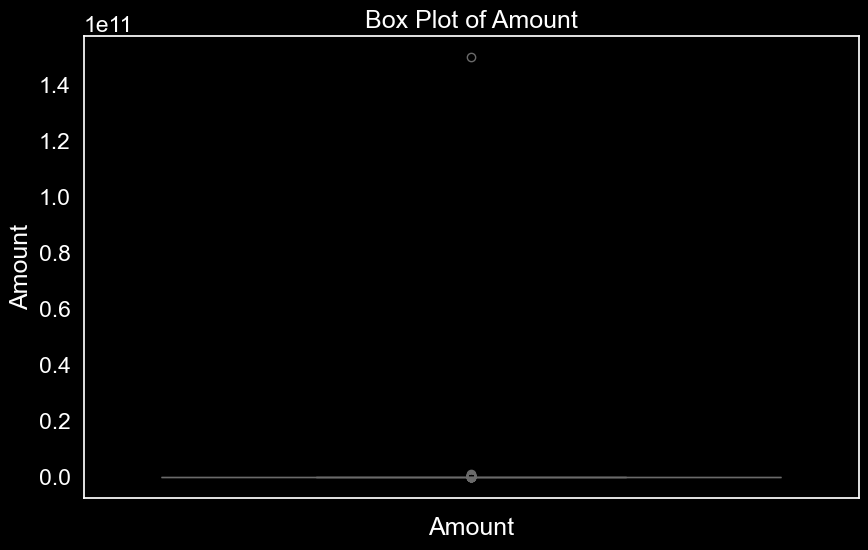

In [145]:
# Descriptive Statistics
print("Descriptive Statistics for 'Amount' column:")
print(cl_df2021['Amount'].describe())

# set theme
sns.set_theme(style="dark", palette="dark", font="sans-serif", font_scale=1.5)
plt.style.use("dark_background")
custom_palette = ["cyan", "magenta", "yellow"]

# Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(y=cl_df2021['Amount'])
plt.title('Box Plot of Amount')
plt.xlabel('Amount')
plt.show()

***Drop all duplicates that have none in 'Stage' column***

In [146]:
# Separate rows with 'Debt' in the 'Stage' column
debt_rows = cl_df2021[cl_df2021['Stage'] == 'Debt']
non_debt_rows = cl_df2021[cl_df2021['Stage'] != 'Debt']

# Remove all duplicate rows based on the first 7 columns in non-debt rows, keeping the last occurrence
non_debt_rows.drop_duplicates(subset=non_debt_rows.columns[0:7], inplace=True, ignore_index=True, keep=False)

# Concatenate the debt and non-debt rows back together
cl_df2021 = pd.concat([non_debt_rows,debt_rows], ignore_index=True)

# Display info of Data Frame
cl_df2021.info()

# Display the first 5 rows of the DataFrame
cl_df2021.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1178 entries, 0 to 1177
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1178 non-null   object 
 1   Founded        1177 non-null   float64
 2   HeadQuarter    1177 non-null   object 
 3   Sector         1178 non-null   object 
 4   What_it_does   1178 non-null   object 
 5   Founders       1174 non-null   object 
 6   Investor       1118 non-null   object 
 7   Amount         1029 non-null   float64
 8   Stage          769 non-null    object 
dtypes: float64(2), object(7)
memory usage: 83.0+ KB


,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First",1200000.0,Pre-series A
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management",120000000.0,None
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital",30000000.0,Series D
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital",51000000.0,Series C
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal",2000000.0,Seed


## References

***Adebayo, O. P., Worlu, R. E., Moses, C. L., & Ogunnaike, O. O. (2020). An integrated organisational culture for sustainable environmental performance in the Nigerian Context. Sustainability, 12(20), 8323.***

***David, D., S. Gopalan, and S. Ramachandran. 2020. The Startup Environment and Funding Activity in India. ADBI Working Paper 1145. Tokyo: Asian Development Bank Institute.***

***James Broughel and Adam Thierer. “Technological Innovation and Economic Growth: A Brief Report on the Evidence.” Mercatus Research, Mercatus Center at George Mason University, Arlington, VA, February 2019.***

***Vickers, Chris, and Nicolas L. Ziebarth. "Lessons for Today from Past Periods of Rapid Technological Change." United Nations, Department of Economic and Social Affairs, DESA Working Paper No. 158, March 2019.***

[Back to Top](#Table-of-Contents)
